# Machine Learning

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

* Cargamos .csv y separamos "X" e "y" . Recordemos "X" son todas las columnas excepto la columna target en cambio "y" es la columna target.

In [2]:
df = pd.read_csv('datos_limpios_modelo.csv')

X = df.drop(columns=['precio_contado'])
y = df['precio_contado']

print(f"Shape de X: {X.shape}, Shape de y: {y.shape}")

Shape de X: (88424, 30), Shape de y: (88424,)


In [3]:
df

,es_demo,es_km0,año_matriculacion,kilometraje,financiacion_disponible,latitud,longitud,garantia,potencia_cv,puertas,...,tipo_carroceria_Berlina,tipo_carroceria_Convertible,tipo_carroceria_Deportivo,tipo_carroceria_Descapotable,tipo_carroceria_Familiar,tipo_carroceria_Monovolumen,tipo_carroceria_Pequeño,tipo_carroceria_Stationwagon,tipo_carroceria_Todo Terreno,precio_contado
0,-0.097046,-0.128302,0.507183,-0.846977,0.601266,0.227761,-0.185668,-0.194149,0.101343,-3.690865,...,-0.815620,-0.114689,-0.112442,13.300958,-0.154558,-0.227217,-0.132340,-0.195806,-0.675966,22990.0
1,-0.097046,-0.128302,-0.493206,0.451863,0.601266,0.562944,1.361403,-0.194149,0.018711,-3.690865,...,-0.815620,-0.114689,-0.112442,13.300958,-0.154558,-0.227217,-0.132340,-0.195806,-0.675966,23990.0
2,-0.097046,-0.128302,0.507183,-0.666100,0.601266,-1.051458,-0.374564,-0.194149,-0.027196,-2.340938,...,1.226062,-0.114689,-0.112442,-0.075183,-0.154558,-0.227217,-0.132340,-0.195806,-0.675966,22500.0
3,-0.097046,-0.128302,-0.493206,-0.406718,-1.663156,-0.065502,1.486912,-0.194149,0.110525,-2.340938,...,-0.815620,-0.114689,-0.112442,-0.075183,-0.154558,-0.227217,7.556272,-0.195806,-0.675966,22950.0
4,-0.097046,-0.128302,0.006989,-0.677939,0.601266,0.562944,1.361403,-0.194149,-0.210824,-2.340938,...,1.226062,-0.114689,-0.112442,-0.075183,-0.154558,-0.227217,-0.132340,-0.195806,-0.675966,16999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88419,-0.097046,-0.128302,1.257475,-1.251092,0.601266,0.935961,0.145689,1.936766,-0.541354,0.358916,...,-0.815620,-0.114689,-0.112442,-0.075183,-0.154558,-0.227217,-0.132340,-0.195806,1.479364,17590.0
88420,-0.097046,-0.128302,1.007378,-1.250953,0.601266,0.562944,1.361403,-0.194149,-0.669893,0.358916,...,-0.815620,-0.114689,-0.112442,-0.075183,-0.154558,-0.227217,7.556272,-0.195806,-0.675966,26838.0
88421,-0.097046,-0.128302,1.007378,-1.198896,0.601266,-0.820295,-0.786023,7.264054,-0.669893,0.358916,...,-0.815620,-0.114689,-0.112442,-0.075183,-0.154558,-0.227217,-0.132340,-0.195806,1.479364,21900.0
88422,-0.097046,-0.128302,1.257475,-1.171300,0.601266,0.935961,0.145689,6.198596,-0.669893,0.358916,...,-0.815620,-0.114689,-0.112442,-0.075183,-0.154558,-0.227217,-0.132340,-0.195806,1.479364,22990.0


* Dividimos los datos en conjuntos de entrenamiento y prueba usando "train_test_split"

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (70739, 30), X_test: (17685, 30)
y_train: (70739,), y_test: (17685,)


* Entrenamos varios modelos de regresión con el objetivo de predecir el precio del coche.
* Evaluamos su rendimiento usando varias métricas, principalmente el **R² score**, para identificar cuál se ajusta mejor a los datos.

In [5]:
modelos = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42, n_estimators=100),
    'AdaBoost': AdaBoostRegressor(random_state=42, n_estimators=50),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=3)
}

results = {}

for name, model in modelos.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}
    print(f"{name} -> MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.4f}")


Linear Regression -> MAE: 3577.94, MSE: 928881268.49, RMSE: 30477.55, R2: 0.8070


Random Forest -> MAE: 2709.46, MSE: 1301663151.71, RMSE: 36078.57, R2: 0.7295
Gradient Boosting -> MAE: 3254.97, MSE: 1185285312.95, RMSE: 34427.97, R2: 0.7537
AdaBoost -> MAE: 13293.70, MSE: 2536600237.11, RMSE: 50364.67, R2: 0.4729
K-Nearest Neighbors -> MAE: 5188.53, MSE: 1434532406.53, RMSE: 37875.22, R2: 0.7019


* Seleccionamos el mejor modelo y lo entrenamos con todos los datos.

In [6]:
mejor_modelo_nombre = max(results, key=lambda x: results[x]['R2'])
mejor_modelo = modelos[mejor_modelo_nombre]

mejor_modelo.fit(X, y)

print(f"Mejor modelo: {mejor_modelo_nombre}")


Mejor modelo: Linear Regression


* Visualizamos la **importancia de cada variable** a traves de los coeficientes del modelo de regresion lineal.
* Los coeficientes indican cuanto influye cada caracteristica en el precio: valores positivos aumentan el precio, y valores negativos lo disminuyen.
* Ordenamos las caracteristicas por la magnitud absoluta del coeficiente para destacar las mas influyentes.


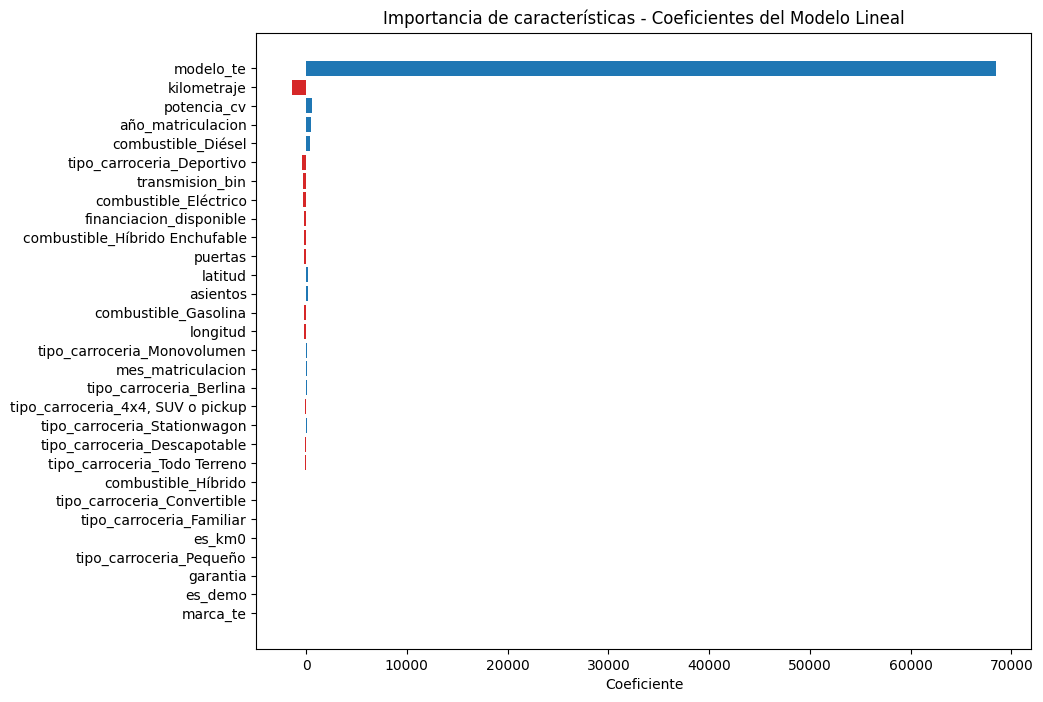

In [7]:
features = X.columns
coeficientes = mejor_modelo.coef_

df_importancia = pd.DataFrame({
    'feature': features,
    'coefficient': coeficientes
}).reindex(coeficientes.argsort()[::-1]) 

df_importancia = df_importancia.reindex(df_importancia['coefficient'].abs().sort_values(ascending=False).index)

plt.figure(figsize=(10, 8))
bars = plt.barh(df_importancia['feature'], df_importancia['coefficient'], color=['tab:blue' if c > 0 else 'tab:red' for c in df_importancia['coefficient']])
plt.xlabel('Coeficiente')
plt.title('Importancia de características - Coeficientes del Modelo Lineal')
plt.gca().invert_yaxis()
plt.show()

In [8]:
top_features = df_importancia['feature'].head(10).tolist()

X_top = X[top_features]

print(f"Shape original de X: {X.shape}")
print(f"Shape de X_top (10 features): {X_top.shape}")

Shape original de X: (88424, 30)
Shape de X_top (10 features): (88424, 10)


In [9]:
df_top = X_top.copy()
df_top['precio_contado'] = y

df_top.to_csv('datos_limpios_modelo_10cols.csv', index=False)

In [10]:
X_train_top, X_test_top, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, random_state=42
)

print(f"X_train_top: {X_train_top.shape}, X_test_top: {X_test_top.shape}")

X_train_top: (70739, 10), X_test_top: (17685, 10)


In [11]:
modelos_top = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42, n_estimators=100),
    'AdaBoost': AdaBoostRegressor(random_state=42, n_estimators=50),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=3)
}

results_top = {}

for name, model in modelos_top.items():
    model.fit(X_train_top, y_train)
    y_pred = model.predict(X_test_top)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results_top[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}
    print(f"{name} -> MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.4f}")


Linear Regression -> MAE: 3552.72, MSE: 915964292.34, RMSE: 30264.90, R2: 0.8097
Random Forest -> MAE: 2732.96, MSE: 1251592279.86, RMSE: 35377.85, R2: 0.7399
Gradient Boosting -> MAE: 3248.72, MSE: 1074488197.39, RMSE: 32779.39, R2: 0.7767
AdaBoost -> MAE: 52393.53, MSE: 5786801745.41, RMSE: 76071.03, R2: -0.2026
K-Nearest Neighbors -> MAE: 3745.67, MSE: 1268627154.61, RMSE: 35617.79, R2: 0.7364


In [12]:
mejor_modelo_nombre_top = max(results_top, key=lambda x: results_top[x]['R2'])
mejor_modelo_top = modelos_top[mejor_modelo_nombre_top]

mejor_modelo_top.fit(X_top, y)

print(f"Mejor modelo con 10 features: {mejor_modelo_nombre_top}")


Mejor modelo con 10 features: Linear Regression


In [13]:
os.makedirs('modelos', exist_ok=True)

with open('modelos/mejor_modelo_top.pkl', 'wb') as f:
    pickle.dump(mejor_modelo_top, f)

with open('modelos/columnas_top.pkl', 'wb') as f:
    pickle.dump(top_features, f)
